In [1]:
import pandas as pd 
import urllib
import matplotlib.pyplot as plt
from matplotlib import dates, colors
import numpy as np 
from matplotlib import dates
from scipy.io import readsav
from sunpy.net import Fido, attrs as a
from astropy.time import Time, TimeDelta
import astrospice
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
from astropy import units as u

## Fermi/GBM flare list

In [2]:
def get_fermi_flare_list():
    url = "https://hesperia.gsfc.nasa.gov/fermi/gbm/qlook/fermi_gbm_flare_list.txt"
    urllib.request.urlretrieve(url, url.split("/")[-1])

In [3]:
fermi_flares = pd.read_csv("fermi_gbm_flare_list.txt", skiprows=8, skipfooter=35, 
                 encoding = "ISO-8859-1", delim_whitespace=True, engine="python",
                 usecols=[0,1,2,3,4,5,6, 7, 8, 9, 10, 11], 
                 names=["flare", "date", "ts", "tp", "te", "dur", "peak counts", 
                        "total_counts", "sun_det0", "sun_det1", "sun_det2", "sun_det3"])

In [4]:
fermi_flares["t_start"] = pd.to_datetime(fermi_flares["date"] + fermi_flares["ts"], format="%d-%b-%Y%H:%M:%S")
fermi_flares["t_peak"] = pd.to_datetime(fermi_flares["date"] + fermi_flares["tp"], format="%d-%b-%Y%H:%M:%S")
fermi_flares["t_end"] = pd.to_datetime(fermi_flares["date"] + fermi_flares["te"], format="%d-%b-%Y%H:%M:%S")

In [5]:
fermi_flares.drop(columns=["ts", "tp", "te"], inplace=True)

In [6]:
fermi_flares.head(3)

,flare,date,dur,peak counts,total_counts,sun_det0,sun_det1,sun_det2,sun_det3,t_start,t_peak,t_end
0,081211_1142,11-Dec-2008,197,2408,90103,n5,n1,n3,n4,2008-12-11 11:42:14,2008-12-11 11:42:51,2008-12-11 11:45:31
1,090706_1702,6-Jul-2009,139,2434,45224,n5,n1,n3,n4,2009-07-06 17:02:53,2009-07-06 17:03:10,2009-07-06 17:05:13
2,091025_0216,25-Oct-2009,1114,3859,553653,n5,n1,n3,n4,2009-10-25 02:16:59,2009-10-25 02:21:29,2009-10-25 02:35:33


In [7]:
new_fermi_flares = fermi_flares[fermi_flares["t_start"] > "2021-01-01"]
new_fermi_flares.reset_index(inplace=True, drop=True)

In [8]:
new_fermi_flares[new_fermi_flares["t_start"]>="2021-11-01"]

,flare,date,dur,peak counts,total_counts,sun_det0,sun_det1,sun_det2,sun_det3,t_start,t_peak,t_end
104,211101_0123,1-Nov-2021,1204,8195,3203613,n5,n1,n3,n4,2021-11-01 01:23:41,2021-11-01 01:29:46,2021-11-01 01:43:45
105,211101_2042,1-Nov-2021,131,3356,52127,n5,n4,n2,n1,2021-11-01 20:42:15,2021-11-01 20:43:12,2021-11-01 20:44:26
106,211101_2153,1-Nov-2021,373,1386,77564,n3,n1,n0,n5,2021-11-01 21:53:35,2021-11-01 21:54:08,2021-11-01 21:59:48
107,211101_2337,1-Nov-2021,267,14644,743262,n5,n1,n3,n0,2021-11-01 23:37:21,2021-11-01 23:39:18,2021-11-01 23:41:48
108,211102_0211,2-Nov-2021,3316,8568,2503123,n5,n4,n2,n1,2021-11-02 02:11:31,2021-11-02 02:59:46,2021-11-02 03:06:47
...,...,...,...,...,...,...,...,...,...,...,...,...
553,220712_0323,12-Jul-2022,495,51376,3479191,n5,n1,n3,n0,2022-07-12 03:23:57,2022-07-12 03:25:24,2022-07-12 03:32:12
554,220712_0940,12-Jul-2022,123,4639,192209,n1,n5,n3,n0,2022-07-12 09:40:43,2022-07-12 09:41:16,2022-07-12 09:42:47
555,220712_1224,12-Jul-2022,557,699,79192,n5,n1,n3,n0,2022-07-12 12:24:43,2022-07-12 12:27:27,2022-07-12 12:34:00
556,220712_1352,12-Jul-2022,273,10753,808531,n5,n4,n2,n1,2022-07-12 13:52:27,2022-07-12 13:53:45,2022-07-12 13:57:00


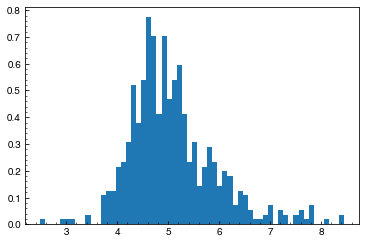

In [9]:
_ = plt.hist(np.log10(new_fermi_flares["total_counts"].values), bins=60, density=True)

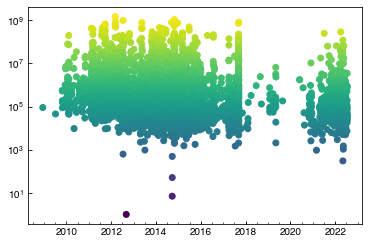

In [10]:
plt.scatter(fermi_flares["t_peak"], fermi_flares["total_counts"], c=fermi_flares["total_counts"], 
            norm=colors.LogNorm())
plt.yscale("log")

In [11]:
fermi_flares["unique_month"] = fermi_flares["t_peak"].dt.strftime("%Y-%m")

Text(0.5, 0, 'Time')

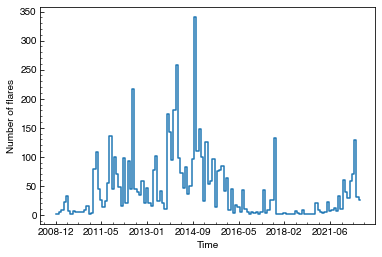

In [12]:
fig, ax = plt.subplots()
fermi_flares.groupby("unique_month").count()["flare"].plot(drawstyle="steps-mid")
ax.set_ylabel("Number of flares")
ax.set_xlabel("Time")

## GOES flare list

In [13]:
# res = Fido.search(a.Time("2021-01-01", "2022-07-18"), 
#                   a.hek.EventType("FL"),
#                   a.hek.FL.GOESCls >= "C1.0")

In [14]:
# new_table = res["hek"]["event_starttime", "event_peaktime",
#                         "event_endtime", "fl_goescls", "ar_noaanum", 'hpc_x', 'hpc_y', "frm_name"]
# new_table2 = new_table[new_table["frm_name"]=="SWPC"]
# new_table2.to_pandas().to_csv("goes_flares_20210101_20220718.csv", index_label=False)

In [15]:
hek_flares = pd.read_csv("goes_flares_20210101_20220718.csv")
swpc_flares = pd.read_csv("swpc_flarelist_20100101-20220717_concat.csv")

In [16]:
hek_flares["tstart_dt"] = pd.to_datetime(hek_flares["event_starttime"])

In [17]:
def get_goes_class(x):
    if x[0]=="C":
        return float(x[1:])*1e-6
    elif x[0] == "M":
        return float(x[1:])*(1e-5)
    elif x[0] == "X":
        return float(x[1:])*(1e-4)
    elif x[0] == "B":
        return float(x[1:])*(1e-7)
    elif x[0] == "A":
        return float(x[1:])*(1e-8)
    else:
        return



In [18]:
hek_flares["goes_flux"] = hek_flares["fl_goescls"].map(get_goes_class)

In [19]:
swpc_flares["goes_class_ind"].unique()

array(['C', 'M', 'X'], dtype=object)

In [20]:
swpc_flares["tstart_dt"] = pd.to_datetime(swpc_flares["ts"], format="%Y%m%d%H%M%S")
swpc_flares["unique_month"] = swpc_flares.tstart_dt.dt.strftime("%Y-%m")
# swpc_flares_new = swp

In [21]:
swpc_flares.groupby("unique_month").count()["goes_class_ind"]

unique_month
2010-01     34
2010-02     53
2010-03      9
2010-04      1
2010-05      9
          ... 
2022-03    150
2022-04    224
2022-05    256
2022-06    107
2022-07    119
Name: goes_class_ind, Length: 127, dtype: int64

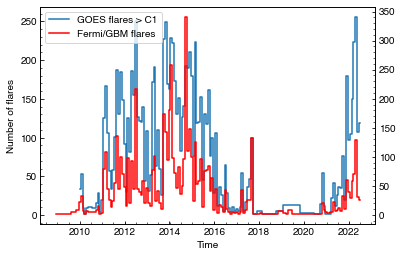

In [23]:
fig, ax = plt.subplots()
plt.plot(pd.to_datetime(swpc_flares.groupby("unique_month").count().index), 
         swpc_flares.groupby("unique_month").count()["goes_class_ind"],
         drawstyle="steps-mid", label="GOES flares > C1")
plt.plot(np.nan, color='r', label="Fermi/GBM flares")
ax2 = ax.twinx()
ax2.plot(pd.to_datetime(fermi_flares.groupby("unique_month").count().index), 
         fermi_flares.groupby("unique_month").count()["flare"],
         drawstyle="steps-mid", color='r')
ax.set_ylabel("Number of flares")
ax.set_xlabel("Time")
ax.legend()

plt.savefig("fermi_flare_rate.png")

## STIX flares

In [24]:
from stixdcpy.net import JSONRequest as jreq

In [25]:
flares=jreq.fetch_flare_list('2021-01-01T00:00:00', '2021-12-31T00:00:00', sort='goes')
flares2=jreq.fetch_flare_list('2022-01-01T00:00:00', '2022-06-01T00:00:00', sort='goes')

In [26]:
df1 = pd.DataFrame(flares)
df2 = pd.DataFrame(flares2)

In [27]:
stix_flares = pd.concat([df1, df2])

In [28]:
#stix_flares.to_csv("stix_flares_20210101_20220601.csv", index_label=False)

In [29]:
stix_flares["start_UTC"] = pd.to_datetime(stix_flares["start_UTC"])

In [30]:
stix_flares.sort_values(by="start_UTC", inplace=True)

In [31]:
stix_flares.reset_index(drop=True, inplace=True)

In [32]:
stix_flares[stix_flares["start_UTC"]>="2021-11-01"].iloc[1]

flare_id                                2111010120
duration                                       116
peak_UTC                   2021-11-01T01:20:20.048
LC0_BKG                                      271.0
_id                                           2694
GOES_class                                    C2.1
GOES_flux                                 0.000002
CFL_X_arcsec                                   NaN
CFL_Y_arcsec                                   NaN
start_UTC               2021-11-01 01:19:20.048000
end_UTC                    2021-11-01T01:21:16.048
LC0_peak_counts_4sec                          1855
Name: 2329, dtype: object

In [33]:
new_fermi_flares[new_fermi_flares["t_start"]>="2021-11-01"].iloc[0]

flare                   211101_0123
date                     1-Nov-2021
dur                            1204
peak counts                    8195
total_counts                3203613
sun_det0                         n5
sun_det1                         n1
sun_det2                         n3
sun_det3                         n4
t_start         2021-11-01 01:23:41
t_peak          2021-11-01 01:29:46
t_end           2021-11-01 01:43:45
Name: 104, dtype: object

In [34]:
stix_flares["goes_class_ind"] = [x[0] for x in stix_flares["GOES_class"]]
stix_flares_c = stix_flares[stix_flares["goes_class_ind"].isin(["X", "M", "C"])]

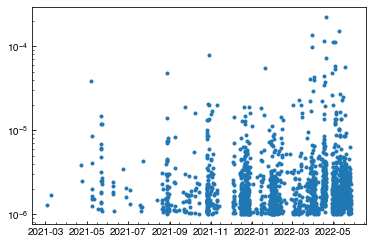

In [35]:
fig, ax = plt.subplots()
plt.plot(stix_flares_c.start_UTC, stix_flares_c.GOES_flux, marker='.', ls='')#="steps-mid")
#plt.plot(hek_flares["tstart_dt"], hek_flares["goes_flux"], marker='.', ls='')
plt.yscale("log")

In [36]:
stix_flares_c.reset_index(drop=True, inplace=True)

In [37]:
stix_flares_c

,flare_id,duration,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,start_UTC,end_UTC,LC0_peak_counts_4sec,goes_class_ind
0,2103022359,200,2021-03-02T23:59:23.152,271.0,353,C1.3,0.000001,-2000.0,-2000.0,2021-03-02 23:58:03.152,2021-03-03T00:01:23.152,12799,C
1,2103091231,844,2021-03-09T12:31:35.314,271.0,457,C1.7,0.000002,-2000.0,-2000.0,2021-03-09 12:22:03.313,2021-03-09T12:36:07.315,4351,C
2,2104220449,4556,2021-04-22T04:49:28.943,247.0,586,C3.9,0.000004,0.0,0.0,2021-04-22 04:17:05.039,2021-04-22T05:33:00.947,2687,C
3,2104232311,532,2021-04-23T23:11:23.798,247.0,587,C2.5,0.000002,1060.0,-520.0,2021-04-23 23:09:07.798,2021-04-23T23:17:59.799,799,C
4,2105071900,1668,2021-05-07T19:00:15.200,247.0,706,M3.9,0.000039,540.0,270.0,2021-05-07 18:51:07.200,2021-05-07T19:18:55.202,311295,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,2205271156,1080,2022-05-27T11:56:44.300,271.0,7520,C1.7,0.000002,None,None,2022-05-27 11:51:28.300,2022-05-27T12:09:28.302,1471,C
2051,2205271540,136,2022-05-27T15:40:56.323,247.0,7525,C1.4,0.000001,None,None,2022-05-27 15:40:16.323,2022-05-27T15:42:32.323,335,C
2052,2205271629,80,2022-05-27T16:29:52.328,247.0,7526,C1.0,0.000001,None,None,2022-05-27 16:29:12.328,2022-05-27T16:30:32.328,399,C
2053,2205271922,900,2022-05-27T19:22:56.346,247.0,7551,C1.5,0.000001,None,None,2022-05-27 19:16:48.346,2022-05-27T19:31:48.347,543,C


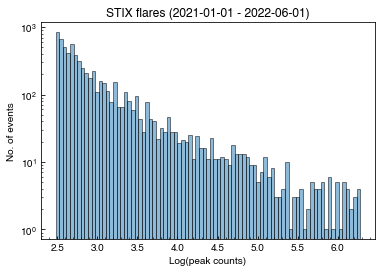

In [56]:
fig, ax = plt.subplots()
ax.hist(np.log10(stix_flares["LC0_peak_counts_4sec"]), bins=85, edgecolor='k', alpha=0.5)
# ax2 = ax.twinx()
# ax2.hist(np.log10(new_fermi_flares["peak counts"]), bins=100, edgecolor='k', alpha=0.5, color='r')
ax.set_yscale("log")

ax2.set_yscale("log")
ax.set_xlabel("Log(peak counts)")
ax.set_ylabel("No. of events")
ax.set_title("STIX flares (2021-01-01 - 2022-06-01)")
plt.savefig("stix_flare_dist.png")

In [59]:
stix_flares["unique_month"] = stix_flares["start_UTC"].dt.strftime("%Y-%m")

Text(0.5, 0, 'Time')

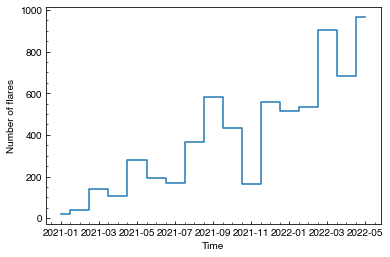

In [60]:
fig, ax = plt.subplots()
stix_flares.groupby("unique_month").count()["flare_id"].plot(drawstyle="steps-mid")
ax.set_ylabel("Number of flares")
ax.set_xlabel("Time")

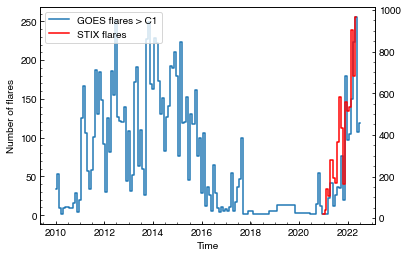

In [63]:
fig, ax = plt.subplots()
plt.plot(pd.to_datetime(swpc_flares.groupby("unique_month").count().index), 
         swpc_flares.groupby("unique_month").count()["goes_class_ind"],
         drawstyle="steps-mid", label="GOES flares > C1")
plt.plot(np.nan, color='r', label="STIX flares")
ax2 = ax.twinx()


ax2.plot(pd.to_datetime(stix_flares.groupby("unique_month").count().index), 
         stix_flares.groupby("unique_month").count()["flare_id"],
         drawstyle="steps-mid", color='r')
ax.set_ylabel("Number of flares")
ax.set_xlabel("Time")
ax.legend(loc="upper left")

plt.savefig("stix_goes_flare_rate.png")

In [78]:
len(stix_flares)

6654

In [51]:
fermi_flares.keys()

Index(['flare', 'date', 'dur', 'peak counts', 'total_counts', 'sun_det0',
       'sun_det1', 'sun_det2', 'sun_det3', 't_start', 't_peak', 't_end',
       'unique_month'],
      dtype='object')

In [66]:
new_fermi_flares["unique_month"] = new_fermi_flares["t_peak"].dt.strftime("%Y-%m")

/var/folders/wm/gysdzbp10qv1kcm4zxb5q95xkjzv5q/T/ipykernel_92662/3285926970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_fermi_flares["unique_month"] = new_fermi_flares["t_peak"].dt.strftime("%Y-%m")


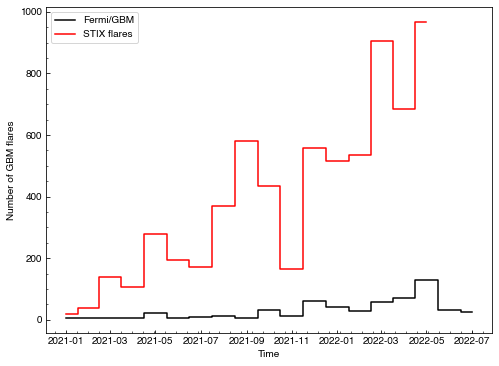

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(pd.to_datetime(new_fermi_flares.groupby("unique_month").count().index), 
         new_fermi_flares.groupby("unique_month").count()["flare"],
         drawstyle="steps-mid", label="Fermi/GBM", color='k')
plt.plot(np.nan, color='r', label="STIX flares")
#ax2 = ax.twinx()


ax.plot(pd.to_datetime(stix_flares.groupby("unique_month").count().index), 
         stix_flares.groupby("unique_month").count()["flare_id"],
         drawstyle="steps-mid", color='r')
ax.set_ylabel("Number of GBM flares")
ax2.set_ylabel("Number of STIX flares", color='r')
ax.set_xlabel("Time")
ax.legend(loc="upper left")
# ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m"))
plt.savefig("stix_fermi_flares_same_axis.png")

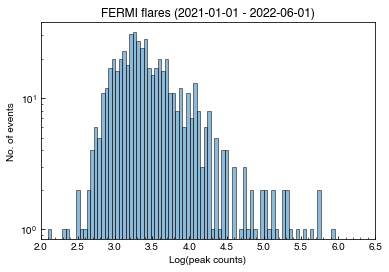

In [54]:
fig, ax = plt.subplots()
ax.hist(np.log10(new_fermi_flares["peak counts"]), bins=85, edgecolor='k', alpha=0.5)
# ax2 = ax.twinx()
# ax2.hist(np.log10(new_fermi_flares["peak counts"]), bins=100, edgecolor='k', alpha=0.5, color='r')
ax.set_yscale("log")
plt.xlim(2, 6.5)
ax2.set_yscale("log")
ax.set_xlabel("Log(peak counts)")
ax.set_ylabel("No. of events")
ax.set_title("FERMI flares (2021-01-01 - 2022-06-01)")
plt.savefig("new_fermi_flare_dist.png")

In [40]:
stix_flares.head(2)

,flare_id,duration,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,start_UTC,end_UTC,LC0_peak_counts_4sec,goes_class_ind
0,2101010439,380,2021-01-01T04:39:50.116,247.0,284,B2.1,2.118954e-07,0.0,0.0,2021-01-01 04:38:38.116,2021-01-01T04:44:58.116,463,B
1,2101011501,344,2021-01-01T15:01:26.174,247.0,285,B1.9,1.905123e-07,NaN,NaN,2021-01-01 14:58:34.174,2021-01-01T15:04:18.174,431,B


In [137]:
new_fermi_flares.head(3)

,flare,date,dur,peak counts,total_counts,sun_det0,sun_det1,sun_det2,sun_det3,t_start,t_peak,t_end
0,210115_2358,15-Jan-2021,106,555,12977,n5,n3,n1,n4,2021-01-15 23:58:34,2021-01-15 00:00:12,2021-01-15 00:00:21
1,210116_2358,16-Jan-2021,106,543,13410,n1,n3,n0,n5,2021-01-16 23:58:32,2021-01-16 23:59:50,2021-01-16 00:00:18
2,210117_2358,17-Jan-2021,106,811,20519,n5,n3,n1,n0,2021-01-17 23:58:34,2021-01-17 23:58:38,2021-01-17 00:00:20


In [138]:
from sunpy.time import TimeRange

In [139]:
timerange = TimeRange("2020-01-01", "2022-01-01")

In [140]:
"2021-01-01" in timerange

True

## Match flarelists

In [141]:
fermi_flares_int = fermi_flares[(fermi_flares["t_start"]>="2021-01-01")&(fermi_flares["t_start"]<="2022-06-01")]
fermi_flares_int.reset_index(inplace=True, drop=True)
#fermi_flares_int.to_csv("fermi_flares_20210101_20220601.csv", index_label=False)

hek_flares_int= hek_flares[(hek_flares["tstart_dt"]>="2021-01-01")&(hek_flares["tstart_dt"]<="2022-06-01")]
hek_flares_int.reset_index(inplace=True, drop=True)
#hek_flares.to_csv("goes_hek_flares_20210101_20220601.csv", index_label=False)

stix_flares_int = stix_flares_c[(stix_flares_c["start_UTC"]>="2021-01-01")&(stix_flares_c["start_UTC"]<="2022-06-01")]
stix_flares_int.reset_index(inplace=True, drop=True)

## STIX flares as a function of position

In [142]:
kernals = astrospice.registry.get_kernels("solar orbiter", "predict")

/Users/laura.hayes/opt/miniconda3/envs/stix_directivity/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [143]:
tstart = Time("2021-01-01T00:00:00.000")
tend = Time("2022-06-01T00:00:00.000")
times = Time(np.arange(tstart, tend, TimeDelta(1*u.day)))

In [144]:
solo_coords = astrospice.generate_coords("SOLAR ORBITER", times)
earth_coords = astrospice.generate_coords("earth", times)
sun_coords = astrospice.generate_coords("sun", times)

solo_coords_hgs = solo_coords.transform_to(frames.HeliographicStonyhurst)
earth_coords_hgs = earth_coords.transform_to(frames.HeliographicStonyhurst)
sun_coords_hgs = sun_coords.transform_to(frames.HeliographicStonyhurst)

In [145]:
solo_flare_coords = astrospice.generate_coords("SOLAR ORBITER", Time(stix_flares_int["start_UTC"]))
solo_flare_coords_hgs = solo_flare_coords.transform_to(frames.HeliographicStonyhurst)

In [146]:
solo_flare_coords_hgs

<SkyCoord (HeliographicStonyhurst: obstime=['2021-03-02T23:58:03.152000000' '2021-03-09T12:22:03.313000000'
 '2021-04-22T04:17:05.039000000' ... '2022-05-27T16:29:12.328000000'
 '2022-05-27T19:16:48.346000000' '2022-05-28T01:27:16.383000000'], rsun=695700.0 km): (lon, lat, radius) in (deg, deg, km)
    [(-127.9807996 , 2.00419873, 8.44448701e+07),
     (-119.36748409, 1.88521104, 9.05619094e+07),
     ( -97.89092262, 0.16413925, 1.29168720e+08), ...,
     ( 164.83857054, 2.32185905, 1.35749270e+08),
     ( 164.82494553, 2.31563693, 1.35850375e+08),
     ( 164.79433192, 2.30189259, 1.36072670e+08)]>

In [147]:
ticks = dates.date2num(times.datetime)

In [148]:
%matplotlib inline

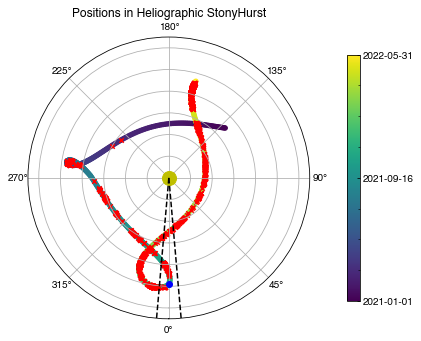

In [149]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='polar')

im = ax.scatter(solo_coords_hgs.lon.to(u.rad), 
           solo_coords_hgs.radius.to(u.au), c=ticks, s=20)

ax.plot(earth_coords_hgs[0].lon.to(u.rad), 
           earth_coords_hgs[0].radius.to(u.au), ms=12, marker='.', color="blue", label="Earth")

ax.plot(sun_coords_hgs[0].lon.to(u.rad), 
        sun_coords_hgs[0].radius.to(u.AU), marker='o', color='y', label="Sun",  ms=14)


ax.scatter(solo_flare_coords_hgs.lon.to(u.rad), 
           solo_flare_coords_hgs.radius.to(u.au), s=20, marker='x', color='r', label="Flares")

ax.plot([0*u.deg.to(u.rad), 5*u.deg.to(u.rad)], [0, 1.3], color='k', ls="dashed")
ax.plot([0*u.deg.to(u.rad), -5*u.deg.to(u.rad)], [0, 1.3], color='k', ls="dashed")

ax.set_theta_zero_location("S")
_ = ax.set_yticklabels([])

ax.set_rlim(0, 1.3)
ax.set_title("Positions in Heliographic StonyHurst")

cbar = fig.colorbar(im, ticks=[ticks[0],ticks[int(len(ticks)/2)], ticks[-1]], pad=0.1, shrink=0.6)
cbar.ax.set_yticklabels([dates.num2date(ticks[0]).strftime("%Y-%m-%d"), 
                         dates.num2date(ticks[int(len(ticks)/2)]).strftime("%Y-%m-%d"),
                         dates.num2date(ticks[-1]).strftime("%Y-%m-%d")])  # vertically oriented colorbar
#ax.legend()
plt.tight_layout()
plt.savefig("orbit_from_earth.png", dpi=300, facecolor='w', bbox_inches="tight")

In [150]:
stix_flares_c["loc"] = solo_flare_coords_hgs

/var/folders/wm/gysdzbp10qv1kcm4zxb5q95xkjzv5q/T/ipykernel_82768/676685316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stix_flares_c["loc"] = solo_flare_coords_hgs


In [151]:
solo_flare_coords_hgs.lon.value

array([-127.9807996 , -119.36748409,  -97.89092262, ...,  164.83857054,
        164.82494553,  164.79433192])

In [152]:
stix_flares_c["lon"] = solo_flare_coords_hgs.lon.value
stix_flares_c["rad"] = solo_flare_coords_hgs.radius.value

/var/folders/wm/gysdzbp10qv1kcm4zxb5q95xkjzv5q/T/ipykernel_82768/777418820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stix_flares_c["lon"] = solo_flare_coords_hgs.lon.value
/var/folders/wm/gysdzbp10qv1kcm4zxb5q95xkjzv5q/T/ipykernel_82768/777418820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stix_flares_c["rad"] = solo_flare_coords_hgs.radius.value


In [153]:
stix_flares_c.head(3)

,flare_id,duration,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,start_UTC,end_UTC,LC0_peak_counts_4sec,goes_class_ind,loc,lon,rad
0,2103022359,200,2021-03-02T23:59:23.152,271.0,353,C1.3,0.000001,-2000.0,-2000.0,2021-03-02 23:58:03.152,2021-03-03T00:01:23.152,12799,C,<SkyCoord (HeliographicStonyhurst: obstime=202...,-127.980800,8.444487e+07
1,2103091231,844,2021-03-09T12:31:35.314,271.0,457,C1.7,0.000002,-2000.0,-2000.0,2021-03-09 12:22:03.313,2021-03-09T12:36:07.315,4351,C,<SkyCoord (HeliographicStonyhurst: obstime=202...,-119.367484,9.056191e+07
2,2104220449,4556,2021-04-22T04:49:28.943,247.0,586,C3.9,0.000004,0.0,0.0,2021-04-22 04:17:05.039,2021-04-22T05:33:00.947,2687,C,<SkyCoord (HeliographicStonyhurst: obstime=202...,-97.890923,1.291687e+08


In [154]:
stix_flares_c.keys()

Index(['flare_id', 'duration', 'peak_UTC', 'LC0_BKG', '_id', 'GOES_class',
       'GOES_flux', 'CFL_X_arcsec', 'CFL_Y_arcsec', 'start_UTC', 'end_UTC',
       'LC0_peak_counts_4sec', 'goes_class_ind', 'loc', 'lon', 'rad'],
      dtype='object')

In [155]:
columns_of_interest = ["start_UTC", "peak_UTC", "end_UTC", "duration", "GOES_flux", 
                       'CFL_X_arcsec', 'CFL_Y_arcsec',
                       "GOES_class", "LC0_peak_counts_4sec", "lon", "rad"]

In [156]:
stix_save_flares = stix_flares_c[columns_of_interest]

In [157]:
stix_save_flares.head(3)

,start_UTC,peak_UTC,end_UTC,duration,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,GOES_class,LC0_peak_counts_4sec,lon,rad
0,2021-03-02 23:58:03.152,2021-03-02T23:59:23.152,2021-03-03T00:01:23.152,200,0.000001,-2000.0,-2000.0,C1.3,12799,-127.980800,8.444487e+07
1,2021-03-09 12:22:03.313,2021-03-09T12:31:35.314,2021-03-09T12:36:07.315,844,0.000002,-2000.0,-2000.0,C1.7,4351,-119.367484,9.056191e+07
2,2021-04-22 04:17:05.039,2021-04-22T04:49:28.943,2021-04-22T05:33:00.947,4556,0.000004,0.0,0.0,C3.9,2687,-97.890923,1.291687e+08


In [159]:
stix_save_flares.to_csv("stix_flares_c_with_loc.csv", index_label=False)

In [160]:
stix_5deg = stix_flares_c[(stix_flares_c["lon"]<=5)&(stix_flares_c["lon"]>=-5)]

In [161]:
stix_5deg[stix_5deg["start_UTC"]>="2021-11-01"]

,flare_id,duration,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,start_UTC,end_UTC,LC0_peak_counts_4sec,goes_class_ind,loc,lon,rad
233,2111010110,484,2021-11-01T01:10:04.047,271.0,2693,C1.9,0.000002,NaN,NaN,2021-11-01 01:08:08.047,2021-11-01T01:16:12.048,2175,C,<SkyCoord (HeliographicStonyhurst: obstime=202...,-1.726097,1.236525e+08
234,2111010120,116,2021-11-01T01:20:20.048,271.0,2694,C2.1,0.000002,NaN,NaN,2021-11-01 01:19:20.048,2021-11-01T01:21:16.048,1855,C,<SkyCoord (HeliographicStonyhurst: obstime=202...,-1.723890,1.236602e+08
235,2111010137,2236,2021-11-01T01:37:12.050,271.0,2695,M1.6,0.000016,0.0,0.0,2021-11-01 01:26:04.049,2021-11-01T02:03:20.053,63487,M,<SkyCoord (HeliographicStonyhurst: obstime=202...,-1.722564,1.236649e+08
236,2111010328,256,2021-11-01T03:28:08.066,271.0,2696,C1.3,0.000001,170.0,0.0,2021-11-01 03:26:20.065,2021-11-01T03:30:36.066,991,C,<SkyCoord (HeliographicStonyhurst: obstime=202...,-1.698954,1.237477e+08
237,2111011750,3988,2021-11-01T17:50:26.749,271.0,2703,C1.3,0.000001,1080.0,-350.0,2021-11-01 17:33:10.747,2021-11-01T18:39:38.754,991,C,<SkyCoord (HeliographicStonyhurst: obstime=202...,-1.536810,1.243301e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,2203072336,1776,2022-03-07T23:36:45.840,303.0,4782,C1.1,0.000001,None,None,2022-03-07 23:24:25.839,2022-03-07T23:54:01.841,1727,C,<SkyCoord (HeliographicStonyhurst: obstime=202...,1.141636,7.316038e+07
949,2203080307,2604,2022-03-08T03:07:38.761,303.0,4795,C2.1,0.000002,None,None,2022-03-08 02:48:54.759,2022-03-08T03:33:07.864,17407,C,<SkyCoord (HeliographicStonyhurst: obstime=202...,1.410536,7.289003e+07
950,2203082222,716,2022-03-08T22:22:39.982,271.0,4828,C1.1,0.000001,None,None,2022-03-08 22:18:51.981,2022-03-08T22:30:47.883,7935,C,<SkyCoord (HeliographicStonyhurst: obstime=202...,3.009396,7.134404e+07
951,2203090751,1088,2022-03-09T07:51:31.941,247.0,4837,C1.0,0.000001,None,None,2022-03-09 07:45:59.941,2022-03-09T08:04:07.942,5887,C,<SkyCoord (HeliographicStonyhurst: obstime=202...,3.822703,7.059567e+07


In [162]:
coords_5deg = solo_flare_coords_hgs[(stix_flares_c["lon"]<=5)&(stix_flares_c["lon"]>=-5)]

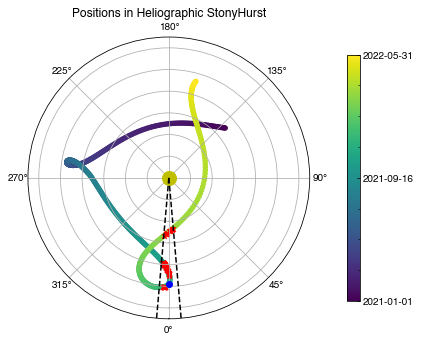

In [163]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='polar')

im = ax.scatter(solo_coords_hgs.lon.to(u.rad), 
           solo_coords_hgs.radius.to(u.au), c=ticks, s=20)

ax.plot(earth_coords_hgs[0].lon.to(u.rad), 
           earth_coords_hgs[0].radius.to(u.au), ms=12, marker='.', color="blue", label="Earth")

ax.plot(sun_coords_hgs[0].lon.to(u.rad), 
        sun_coords_hgs[0].radius.to(u.AU), marker='o', color='y', label="Sun",  ms=14)



ax.scatter(stix_5deg["lon"]*u.deg.to(u.rad), 
           stix_5deg["rad"]*u.km.to(u.au), s=20, marker='x', color='r', label="Flares")


ax.plot([0*u.deg.to(u.rad), 5*u.deg.to(u.rad)], [0, 1.3], color='k', ls="dashed")
ax.plot([0*u.deg.to(u.rad), -5*u.deg.to(u.rad)], [0, 1.3], color='k', ls="dashed")

ax.set_theta_zero_location("S")
_ = ax.set_yticklabels([])

ax.set_rlim(0, 1.3)
ax.set_title("Positions in Heliographic StonyHurst")

cbar = fig.colorbar(im, ticks=[ticks[0],ticks[int(len(ticks)/2)], ticks[-1]], pad=0.1, shrink=0.6)
cbar.ax.set_yticklabels([dates.num2date(ticks[0]).strftime("%Y-%m-%d"), 
                         dates.num2date(ticks[int(len(ticks)/2)]).strftime("%Y-%m-%d"),
                         dates.num2date(ticks[-1]).strftime("%Y-%m-%d")])  # vertically oriented colorbar
#ax.legend()
plt.tight_layout()
plt.savefig("orbit_from_earth_within5.png", dpi=300, facecolor='w', bbox_inches="tight")

In [164]:
stix_5deg_m = stix_5deg[stix_5deg["goes_class_ind"].isin(["M"])]

In [165]:
stix_5deg_m

,flare_id,duration,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,start_UTC,end_UTC,LC0_peak_counts_4sec,goes_class_ind,loc,lon,rad
160,2110260246,376,2021-10-26T02:46:35.577,247.0,2537,M1.3,0.000013,0.0,0.0,2021-10-26 02:44:51.577,2021-10-26T02:51:07.578,172031,M,<SkyCoord (HeliographicStonyhurst: obstime=202...,-3.798244,1.177350e+08
182,2110261554,376,2021-10-26T15:54:47.660,271.0,2614,M1.0,0.000010,0.0,0.0,2021-10-26 15:51:43.660,2021-10-26T15:57:59.661,86015,M,<SkyCoord (HeliographicStonyhurst: obstime=202...,-3.573378,1.182816e+08
211,2110280739,508,2021-10-28T07:39:39.400,271.0,2601,M1.3,0.000013,290.0,-670.0,2021-10-28 07:38:39.400,2021-10-28T07:47:07.401,155647,M,<SkyCoord (HeliographicStonyhurst: obstime=202...,-2.934817,1.199389e+08
214,2110281030,536,2021-10-28T10:30:15.418,735.0,2650,M2.1,0.000021,330.0,-640.0,2021-10-28 10:27:27.418,2021-10-28T10:36:23.419,221183,M,<SkyCoord (HeliographicStonyhurst: obstime=202...,-2.892091,1.200560e+08
224,2110281526,144,2021-10-28T15:26:15.448,735.0,2656,M2.0,0.000020,320.0,-570.0,2021-10-28 15:24:47.448,2021-10-28T15:27:11.448,155647,M,<SkyCoord (HeliographicStonyhurst: obstime=202...,-2.817601,1.202622e+08
225,2110281540,220,2021-10-28T15:40:07.449,735.0,2657,M7.9,0.000079,320.0,-550.0,2021-10-28 15:37:27.449,2021-10-28T15:41:07.450,344063,M,<SkyCoord (HeliographicStonyhurst: obstime=202...,-2.814449,1.202710e+08
226,2110281736,35680,2021-10-28T17:36:11.461,735.0,2658,M1.4,0.000014,20.0,0.0,2021-10-28 16:12:07.453,2021-10-29T02:06:47.513,1855,M,<SkyCoord (HeliographicStonyhurst: obstime=202...,-2.805832,1.202951e+08
235,2111010137,2236,2021-11-01T01:37:12.050,271.0,2695,M1.6,0.000016,0.0,0.0,2021-11-01 01:26:04.049,2021-11-01T02:03:20.053,63487,M,<SkyCoord (HeliographicStonyhurst: obstime=202...,-1.722564,1.236649e+08
242,2111020242,6240,2021-11-02T02:42:22.803,271.0,2708,M1.7,0.000017,0.0,0.0,2021-11-02 02:12:58.800,2021-11-02T03:56:58.811,47103,M,<SkyCoord (HeliographicStonyhurst: obstime=202...,-1.440809,1.246871e+08
260,2111091653,3160,2021-11-09T16:53:03.716,247.0,2795,M2.0,0.000020,0.0,0.0,2021-11-09 16:37:31.714,2021-11-09T17:30:11.720,55295,M,<SkyCoord (HeliographicStonyhurst: obstime=202...,0.004987,1.320723e+08


In [97]:
stix_90deg = stix_flares_c[((stix_flares_c["lon"]<=90)&(stix_flares_c["lon"]>=20))|
                           ((stix_flares_c["lon"]>=-90)&(stix_flares_c["lon"]<=-20))]

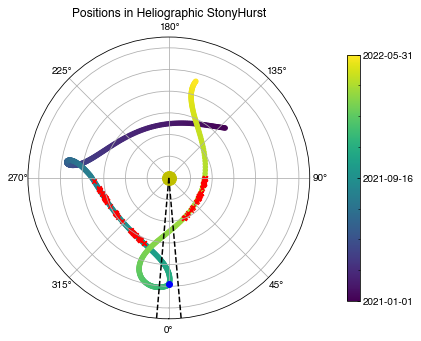

In [98]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='polar')

im = ax.scatter(solo_coords_hgs.lon.to(u.rad), 
           solo_coords_hgs.radius.to(u.au), c=ticks, s=20)

ax.plot(earth_coords_hgs[0].lon.to(u.rad), 
           earth_coords_hgs[0].radius.to(u.au), ms=12, marker='.', color="blue", label="Earth")

ax.plot(sun_coords_hgs[0].lon.to(u.rad), 
        sun_coords_hgs[0].radius.to(u.AU), marker='o', color='y', label="Sun",  ms=14)



ax.scatter(stix_90deg["lon"]*u.deg.to(u.rad), 
           stix_90deg["rad"]*u.km.to(u.au), s=20, marker='x', color='r', label="Flares")


ax.plot([0*u.deg.to(u.rad), 5*u.deg.to(u.rad)], [0, 1.3], color='k', ls="dashed")
ax.plot([0*u.deg.to(u.rad), -5*u.deg.to(u.rad)], [0, 1.3], color='k', ls="dashed")

ax.set_theta_zero_location("S")
_ = ax.set_yticklabels([])

ax.set_rlim(0, 1.3)
ax.set_title("Positions in Heliographic StonyHurst")

cbar = fig.colorbar(im, ticks=[ticks[0],ticks[int(len(ticks)/2)], ticks[-1]], pad=0.1, shrink=0.6)
cbar.ax.set_yticklabels([dates.num2date(ticks[0]).strftime("%Y-%m-%d"), 
                         dates.num2date(ticks[int(len(ticks)/2)]).strftime("%Y-%m-%d"),
                         dates.num2date(ticks[-1]).strftime("%Y-%m-%d")])  # vertically oriented colorbar
#ax.legend()
plt.tight_layout()
plt.savefig("orbit_from_earth_within90.png", dpi=300, facecolor='w', bbox_inches="tight")